# Notebook | PhyNum : motifs au fond d'une piscine

## Import

In [1]:
from PhyNum import *

import cProfile
import pstats

profiler = cProfile.Profile()



## Initialisations

In [2]:
u = np.array([0, 0, -1])  # direction de la lumière

theta = 0

Ry = np.array([[np.cos(theta), 0, np.sin(theta)],
                [0, 1, 0],
                [-np.sin(theta), 0, np.cos(theta)]])

u = Ry @ u



# Déplacement nécessaire des rayons en fonction de leur angle d'incidence (mesuré entre u et ux)
dux = (Lz-h)*np.tan(theta) * np.array([1, 0, 0])

rayons = []
for i in range(Nx-1):
    rayons.append([])
    for j in range(Ny-1):
        rayons[i].append((np.array([(i+1/2)*dx, ((j)+1/2)*dy, 2*h]) + dux, u, 1))


### Surface initiale

In [3]:
surface = np.zeros((Nx, Ny))
h0 = np.zeros((Nx, Ny), dtype=complex)
integrande = np.zeros((Nx, Ny), dtype=complex)
A = np.zeros((Nx, Ny), dtype=complex)
B = np.zeros((Nx, Ny), dtype=complex)

for i in range(Nx):
    for j in range(Ny):
        kx = (i-Nx/2)*dkx
        ky = (j-Ny/2)*dky
        h0[i, j] = random_h0(kx, ky, Ph_Phillips, np.array([1, 0]))

        A[i, j] = h0[i, j]
        B[i, j] = np.conjugate(h0[-i, -j])

integrande[:, :] = (A[:, :] + B[:, :])

surface[:,:] = fact_1[:,:]*np.real(np.fft.ifft2(integrande, norm="forward"))+h

# surface[:,:] = grille_X[:,:]



## Calculs

In [4]:
profiler.enable()

trajectoires = calcul_trajectoires(rayons, surface, A, B,  0)

profiler.disable()



Calcul des trajectoires : 100%|██████████| 31/31 [00:00<00:00, 72.60it/s]


In [5]:
stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats()


         461946 function calls (445566 primitive calls) in 0.512 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.512    0.256 c:\Users\Florent\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3403(run_code)
      8/2    0.000    0.000    0.512    0.256 {built-in method builtins.exec}
        1    0.000    0.000    0.512    0.512 C:\Users\Florent\AppData\Local\Temp\ipykernel_11460\1261989171.py:3(<module>)
        1    0.006    0.006    0.512    0.512 c:\Users\Florent\Documents\Travail\M1 Physique (mag 2)\Cours\PhyNum-Piscine\PhyNum.py:130(calcul_trajectoires)
     1922    0.004    0.000    0.372    0.000 c:\Users\Florent\Documents\Travail\M1 Physique (mag 2)\Cours\PhyNum-Piscine\PhyNum.py:100(find_point_intersection)
     1922    0.013    0.000    0.360    0.000 c:\Users\Florent\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize

In [6]:
motif = calcul_motifs(trajectoires)

motif = np.sqrt(motif)

image = motif_to_alpha(motif)
plt.imsave("caustiques Nx=" + str(Nx) + ".png", image)


## Affichage

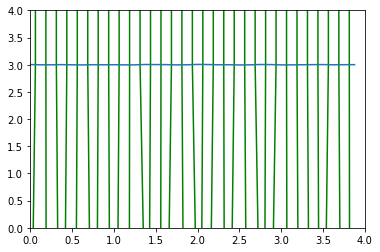

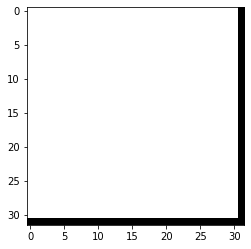

In [7]:
plot_surface(surface)
plt.show()


affiche_rayons(trajectoires, surface, save=True)
plt.show()


plt.imshow(motif, cmap='gray')
plt.show()


In [8]:

# genere_animation_simple(surface, h0, rayons, save_motif=True)


In [9]:

# images = [Image.open(f"Frames/frame{n}.png") for n in range(frames)]

# images[0].save('wave Nx='+ str(Nx) + '.gif', save_all=True,
#                 append_images=images[1:], duration=dt*10**3, loop=0)
    
# images = [Image.open(f"Frames/frame {n} image.png") for n in range(frames)]

# images[0].save('caustiques dynamique Nx=' + str(Nx) + '.gif', save_all=True,
#                    append_images=images[1:], duration=dt*10**3, loop=0)
